# **** Modeling and Evaluation Notebook

## Objectives

* Answering Business requirement 2 : 
        *Predict whether a leaf is infected with powdery mildew or not. 

## Inputs

*  Client will input images of leaves from the following datasets : <br/>
    ** inputs/cherry-leaves_dataset/cherry-leaves/train<br/>
    ** inputs/cherry-leaves_dataset/cherry-leaves/validation <br/>
    ** inputs/cherry-leaves_dataset/cherry-leaves/test <br/> 
    ** image shape embeddings

## Outputs

* Generate images distribution plot in train, validation, and test set
* Perform image augmentation when needed
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Saved model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



---

## Import regular packages 

In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## Change working directory

* Since we are storing the notebooks in a subfolder, we change the working directory.

In [41]:
import os
current_dir = os.getcwd()
current_dir
os.chdir('/workspace/mildew-detection-in-cherry-leaves')
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [42]:
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection-in-cherry-leaves'

## Set input directories 

Set Train, Validation and Test Set

In [43]:
my_data_dir = 'inputs/cherry-leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

Set output directory 

In [44]:
import os
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old Version is already available, create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old Version is already available, create a new version.


Set Labels

In [45]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
    )

Project Labels: ['healthy', 'powdery_mildew']


Set image shape 

In [46]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(150, 150, 3)

# Number of images in train, test and validation data

Calculate the quantity of images in each set by generating a bar graph and save the resulting plot in the '/output/' directory.

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




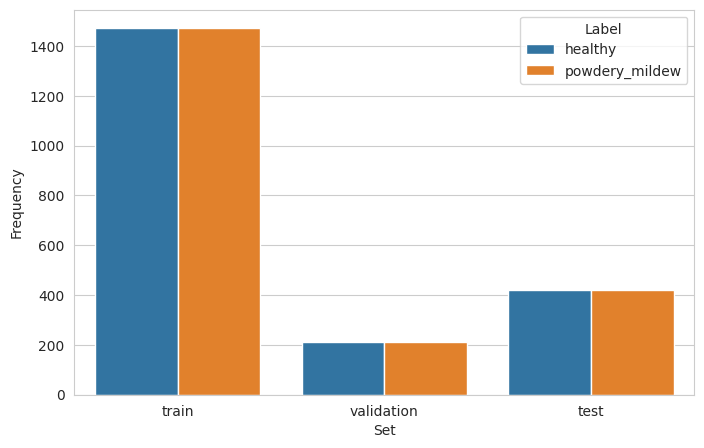

In [47]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

---

# Image data augmentation

* We'll employ image data augmentation techniques to expand our dataset by generating randomized variations of existing images. This approach will help us augment our dataset, which is currently of a moderate size.

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

ImageDataGenerator
* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [49]:
augmented_image_data = ImageDataGenerator(rotation_range=25,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

Augment training image dataset 

In [50]:
batch_size = 32
train_set = augmented_image_data.flow_from_directory(train_path, #fetching images from train folder
                                                    target_size=image_shape[:2],#transforming images with average width and height 
                                                    color_mode='rgb',# standard RGB
                                                    batch_size=batch_size,
                                                    class_mode='binary', #binary class model
                                                    shuffle=True #Randomly shuffle the images
                                                    )
train_set.class_indices                                                    

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment validation image dataset

In [51]:
batch_size = 32 #a set of samples that you feed to the model when training. common is 32
validation_set = augmented_image_data.flow_from_directory(val_path, #fetching images from validation folder
                                                    target_size=image_shape[:2],#transforming images with average width and height 
                                                    color_mode='rgb',# standard RGB
                                                    batch_size=batch_size,
                                                    class_mode='binary', #binary class model
                                                    shuffle=False
                                                    )
train_set.class_indices    

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augment test image dataset

In [52]:
batch_size = 32
test_set = augmented_image_data.flow_from_directory(test_path, #fetching images from test folder
                                                    target_size=image_shape[:2],#transforming images with average width and height 
                                                    color_mode='rgb',# standard RGB
                                                    batch_size=batch_size,
                                                    class_mode='binary', #binary class model
                                                    shuffle=False
                                                    )
train_set.class_indices  

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Plot Augmented Training image 

(32, 150, 150, 3)


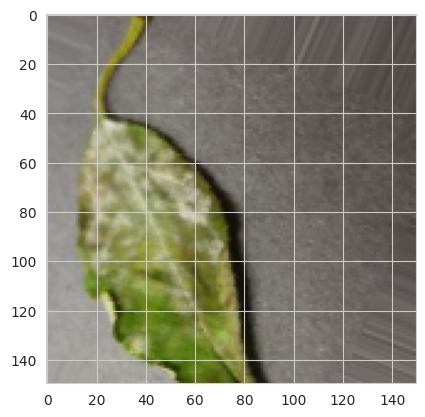

(32, 150, 150, 3)


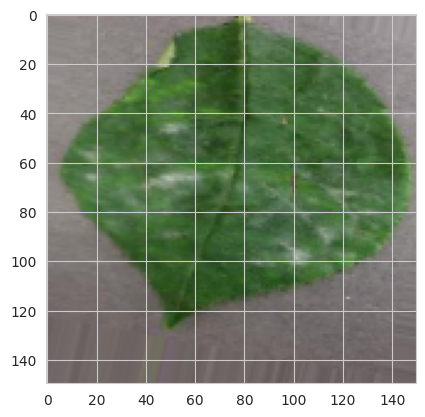

(32, 150, 150, 3)


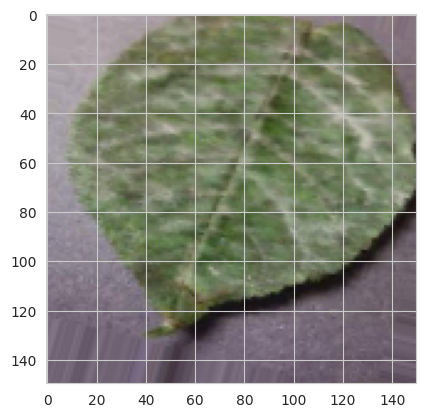

In [53]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Plot Validation Augmented set 

(32, 150, 150, 3)


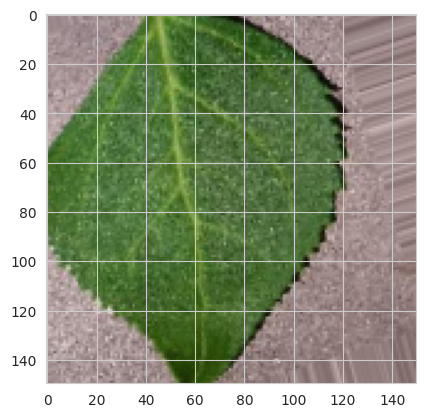

(32, 150, 150, 3)


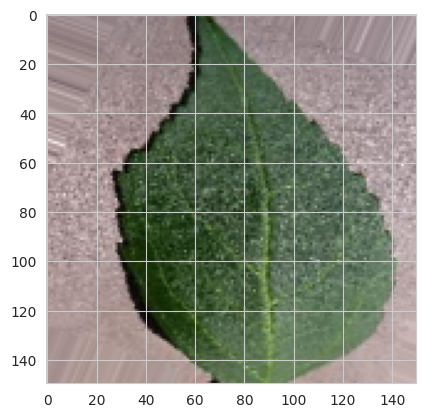

(32, 150, 150, 3)


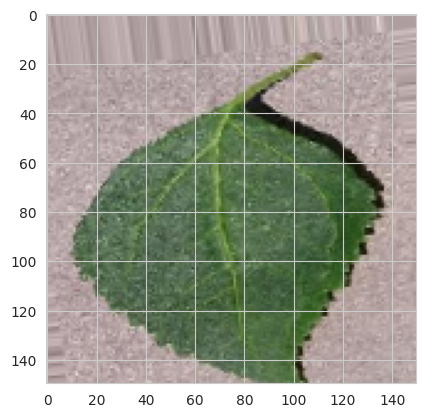

In [54]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Plot Augmented Test Dataset 

(32, 150, 150, 3)


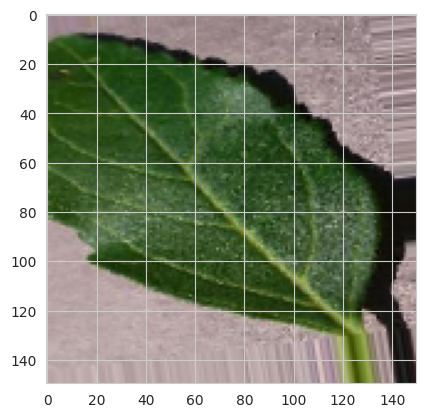

(32, 150, 150, 3)


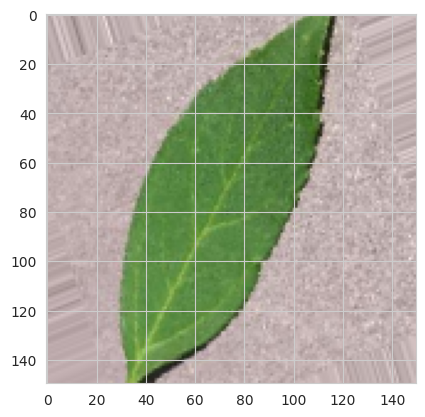

(32, 150, 150, 3)


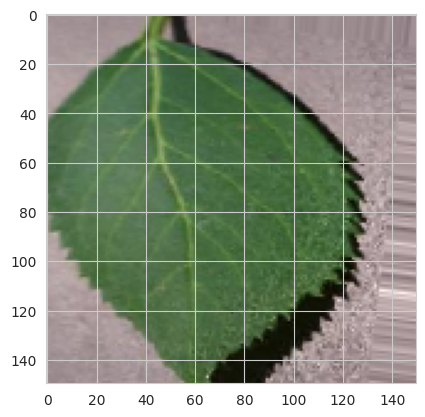

In [55]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Save class_indices

In [56]:
joblib.dump(value=train_set.class_indices ,
            filename=f'{file_path}/class_indices.pkl')

['outputs/v1/class_indices.pkl']

## Model Creation

### ML Model 

A Convolutional Neural Network (CNN) model will be develop to analyze pre-labeled leaf images. The model will be trained to identify the dominant feature in the dataset, which in this case is the presence of fungal infection in the leaf images.


Import model packages

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool3D, MaxPooling2D

Model

notes on model structure :
Deep Neural Networks  work with Parameters and Hyperparameters .
Hyperparameters tune the model parameters so that we can control the performance of the model.

notes on activation models : 
* the /activation /function is used to set boundaries to the output values from the neuron.
Remember a neuron process its inputs to generate an output. This processing is made by an activation function
* Adam (Adaptive Moment Estimation): this algorithm replaces the previous option to update network weights iteratively based on the training data. Based on the experiences, Adam showed to be effective and became very popular since it achieves good results in fast training times, compared to other options.
* binary_crossentropy: A cross-entropy loss is the standard loss function for binary classification problems. The idea is to use when the target values are 0 and 1. A cross-entropy loss increases as the predicted probability diverges from the actual class. It calculates a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1.
* Binary Classification
Our output layer should reflect a prediction of 2 classes.
In binary classification, there are 2 ways to define the output layer, either using sigmoid or softmax as the activation function. The experiences show sigmoid is more effective, however, you could use both.
In this case, you can set
1 neuron with sigmoid as the activation function where the prediction is a probability between 0 and 1. You will define a threshold (default would be 0.5), if the probability is lower than the threshold, the prediction is class 0, otherwise, the prediction is class 1

In [58]:
def create_tf_model():
    model = Sequential() #Cnn model to be used 

    # Chose 'ReLu' as activation function because if the input is negative, then the output is 0, otherwise, the output is equal to the input.
    # Convolution layers are used to select the dominant pixel value from non-dominant pixels in images using filters
    # MaxPooling layers reduce the size of an image by extracting only the dominant pixel within the pool size
    # Convination of both layers reduce the non-esential  part of the image and reduce complexity, therefore increasing accurracy 
    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())#used to flatten the matrix into a vector 
    model.add(Dense(128, activation = 'relu'))#does the matematical operation and gives the output

    model.add(Dropout(0.5))#used to drop 50% of the nodes to avoid overfitting of the model 
    model.add(Dense(1, activation = 'sigmoid')) # used Sigmoid because if input is greater than zero, then neuron output is 1, otherwise is 0
                                                # outputs the probabilistic result 

    model.compile(loss='binary_crossentropy',  # used this hyperparameters because Our output layer should reflect a prediction of 2 classes.
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

### Model Summary

In [59]:
create_tf_model().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

Model tunning :

Keras packages have hyperparameters for tunning functions 
TensorFlow has also check on free time 

Seting up **early stop** to avoid overfitting or underfitting the model .

In [60]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

### Fit model for training 

In [61]:
#Create a function that triggers the learning process and iterates over the number of epochs we choose
model = create_tf_model()
model.fit(train_set,
         epochs=25,
         steps_per_epoch= len(train_set.classes) // batch_size,
         validation_data= validation_set,#used to find out the oerformance of the model while training
         callbacks= [early_stop],
         verbose=1 #Controls the visualisation of learning process. 1 keeps ts default 
         )

Epoch 1/25
17/92 [====>.........................] - ETA: 36s - loss: 0.5169 - accuracy: 0.7316

92/92 [==============================] - 48s 512ms/step - loss: 0.2369 - accuracy: 0.8974 - val_loss: 0.0505 - val_accuracy: 0.9905
Epoch 2/25
92/92 [==============================] - 46s 498ms/step - loss: 0.1263 - accuracy: 0.9579 - val_loss: 0.0810 - val_accuracy: 0.9738
Epoch 3/25
92/92 [==============================] - 46s 498ms/step - loss: 0.0400 - accuracy: 0.9868 - val_loss: 0.0628 - val_accuracy: 0.9786
Epoch 4/25
92/92 [==============================] - 46s 499ms/step - loss: 0.0358 - accuracy: 0.9878 - val_loss: 0.0049 - val_accuracy: 0.9976
Epoch 5/25
92/92 [==============================] - 47s 504ms/step - loss: 0.0185 - accuracy: 0.9956 - val_loss: 0.0182 - val_accuracy: 0.9976
Epoch 6/25
92/92 [==============================] - 56s 610ms/step - loss: 0.0148 - accuracy: 0.9946 - val_loss: 0.0148 - val_accuracy: 0.9952
Epoch 7/25
92/92 [==============================] - 50s 549ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0040 - val_accuracy: 0.9976
Epoch 8/25

In [ ]:
model.save('outputs/v1/powdery_mildew_detector_model.h5')

### Model Performance

Model Learning curve

In [ ]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

KeyError: "None of [Index(['loss', 'val_loss'], dtype='object')] are in the [columns]"

## Model Evaluation 

Load saved model 

In [ ]:
from keras.models import load_model
model = load_model('outputs/v1/powdery_mildew_detector_model.h5')

Evaluate model on Test Set

In [ ]:
evaluation = model.evaluate(test_set)

27/27 [==============================] - 5s 194ms/step - loss: 0.0094 - accuracy: 0.9964


Save Evaluation pickle

In [ ]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

## Predict on new data 

Load random image as PIL

 Image shape: (150, 150), Image mode: RGB


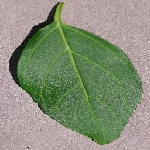

In [ ]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0] # we are choosing here weather infected or non-infected leaf

pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/' + label)[pointer],
                            target_size= image_shape, color_mode='rgb')

print(f" Image shape: {pil_image.size}, Image mode: {pil_image.mode}")
pil_image

Convert image to array and prepare for prediction 

In [ ]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image,axis=0)
print(my_image.shape)

(1, 150, 150, 3)


Predict class probabilities 

In [ ]:
pred_proba = model.predict(my_image)[0,0]

target_map = {v: k for k,v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]: pred_proba = 1 - pred_proba
print(pred_proba)
print(pred_class)

1.0
healthy


## Push files to repo 

Push generated/new files from this Session to GitHub repo

* Gitnore

In [ ]:

!cat .gitignore

core.Microsoft*
core.mongo*
core.python*
env.py
__pycache__/
*.py[cod]
node_modules/
.github/
cloudinary_python.txt
kaggle.json
*.jpg

* Git status

In [ ]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   jupyter_notebooks/02 - DataVisualization.ipynb
	modified:   jupyter_notebooks/03 - Modelling and Evaluating.ipynb
	modified:   outputs/v1/evaluation.pkl
	modified:   outputs/v1/model_training_acc.png
	modified:   outputs/v1/powdery_mildew_detector_model.h5

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add .

In [ ]:
!git commit -m " Fit the model , train it and store the results"

[main 2bf4204]  Fit the model , train it and store the results
 5 files changed, 97 insertions(+), 84 deletions(-)


In [ ]:
!git push

Enumerating objects: 19, done.
Counting objects: 100% (19/19), done.
Delta compression using up to 16 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (10/10), 24.18 MiB | 9.59 MiB/s, done.
Total 10 (delta 4), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/FerchaPombo/mildew-detection-in-cherry-leaves.git
   38f15b3..2bf4204  main -> main
